# Rohan Singla 300322754

### Predicting Car price using Linear Regression Modelling 

### Importing the Required Libraries and Data loading into the data frame

In [919]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sms
#Loading the required libraries for Modelling of Data

In [920]:
cars_data=pd.read_csv(r"Lab02_RSi22754.csv")
#Reading the CSV File into cars_data data frame for further Data Cleaning and EDA

In [921]:
feat_sel=[]
feat_transform=[]
feat_scaling=[]
r2_list=[]
rmse_list=[]
## Setting up of lists to store the Feature selection , transformation used , Scaling used and R2 and RMSE Score

In [922]:
cars_data.head()
#Peeking into the data set

,price,miles,transmission_CVT,transmission_MANUAL,eng_V3,eng_V4,eng_V5,eng_V6,eng_V8,fuel_Gas,...,color_gray,color_green,color_magnetic,color_metallic,color_orange,color_other,color_red,color_silver,color_white,color_yellow
0,15999,48054,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,31795,29050,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
2,13998,7,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,19237,10,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,38868,3,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [923]:
cars_data.shape
#checking the rows and columns using shape function

(685, 27)

In [924]:
cars_data.dtypes
#Checking Data types of the various features in the data_frame

price                  int64
miles                  int64
transmission_CVT       int64
transmission_MANUAL    int64
eng_V3                 int64
eng_V4                 int64
eng_V5                 int64
eng_V6                 int64
eng_V8                 int64
fuel_Gas               int64
fuel_Gasoline          int64
fuel_Hybrid            int64
drive_FWD              int64
drive_RWD              int64
color_blue             int64
color_brown            int64
color_burgundy         int64
color_gray             int64
color_green            int64
color_magnetic         int64
color_metallic         int64
color_orange           int64
color_other            int64
color_red              int64
color_silver           int64
color_white            int64
color_yellow           int64
dtype: object

### EXPLORATORY DATA ANALYSIS

In [925]:
cars_data.describe()
#Calculating statistical data of the dataframe

,price,miles,transmission_CVT,transmission_MANUAL,eng_V3,eng_V4,eng_V5,eng_V6,eng_V8,fuel_Gas,...,color_gray,color_green,color_magnetic,color_metallic,color_orange,color_other,color_red,color_silver,color_white,color_yellow
count,685.000000,685.000000,685.000000,685.000000,685.000000,685.000000,685.000000,685.000000,685.000000,685.000000,...,685.000000,685.000000,685.000000,685.000000,685.000000,685.000000,685.000000,685.000000,685.000000,685.000000
mean,29049.948905,24504.328467,0.021898,0.039416,0.087591,0.175182,0.010219,0.040876,0.008759,0.137226,...,0.035036,0.017518,0.094891,0.016058,0.004380,0.010219,0.132847,0.116788,0.265693,0.002920
std,15434.992281,40055.927126,0.146457,0.194725,0.282906,0.380401,0.100645,0.198147,0.093247,0.344338,...,0.184006,0.131288,0.293278,0.125792,0.066081,0.100645,0.339657,0.321403,0.442025,0.053995
min,1595.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17309.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,26085.000000,51.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,37618.000000,35442.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,83060.000000,215407.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [926]:
cars_data.corr()
#Finding Correlation of the Dataframe

,price,miles,transmission_CVT,transmission_MANUAL,eng_V3,eng_V4,eng_V5,eng_V6,eng_V8,fuel_Gas,...,color_gray,color_green,color_magnetic,color_metallic,color_orange,color_other,color_red,color_silver,color_white,color_yellow
price,1.000000,-0.474067,-0.087174,0.027504,0.055987,-0.221620,0.006775,0.106358,0.056422,-0.122471,...,-0.021481,-0.050957,0.022737,-0.113079,0.003935,0.021208,-0.071272,-0.065387,0.142207,-0.037198
miles,-0.474067,1.000000,0.029871,-0.037590,0.011161,-0.054474,-0.021040,0.042483,0.091132,0.028575,...,0.123460,0.042265,-0.144066,0.175655,-0.040570,-0.004959,0.009111,-0.034084,-0.043382,0.047646
transmission_CVT,-0.087174,0.029871,1.000000,-0.030309,-0.046360,-0.042715,-0.015203,-0.030889,-0.014065,-0.059673,...,0.079989,-0.019980,-0.014410,-0.019115,-0.009924,-0.015203,0.058994,0.007708,-0.022254,-0.008097
transmission_MANUAL,0.027504,-0.037590,-0.030309,1.000000,0.043392,0.044804,0.054016,-0.041818,0.141991,-0.080787,...,0.083809,0.144512,-0.039989,-0.025878,0.100182,-0.020583,0.009132,-0.050301,-0.036922,-0.010962
eng_V3,0.055987,0.011161,-0.046360,0.043392,1.000000,-0.142791,-0.031483,-0.063963,-0.029126,-0.063537,...,-0.002870,-0.041373,-0.012219,-0.039582,-0.020550,-0.031483,-0.045200,0.032040,-0.011008,-0.016766
eng_V4,-0.221620,-0.054474,-0.042715,0.044804,-0.142791,1.000000,-0.046827,-0.095140,-0.043322,-0.049860,...,-0.087816,0.026282,0.008035,0.032783,0.027594,0.029546,0.068552,0.011783,-0.068542,-0.024939
eng_V5,0.006775,-0.021040,-0.015203,0.054016,-0.031483,-0.046827,1.000000,-0.020976,-0.009552,0.001663,...,-0.019362,-0.013568,-0.032900,-0.012981,-0.006739,-0.010324,0.131299,-0.036949,-0.061120,-0.005498
eng_V6,0.106358,0.042483,-0.030889,-0.041818,-0.063963,-0.095140,-0.020976,1.000000,-0.019406,0.003378,...,-0.039337,0.028633,-0.041685,-0.026373,-0.013692,0.125644,-0.015634,-0.052113,0.042741,-0.011171
eng_V8,0.056422,0.091132,-0.014065,0.141991,-0.029126,-0.043322,-0.009552,-0.019406,1.000000,-0.037490,...,0.067295,0.106869,0.023023,-0.012009,-0.006235,-0.009552,0.009367,-0.034183,-0.021075,-0.005087
fuel_Gas,-0.122471,0.028575,-0.059673,-0.080787,-0.063537,-0.049860,0.001663,0.003378,-0.037490,1.000000,...,-0.075993,0.043765,0.030117,-0.017197,0.037800,0.043849,0.006405,0.013500,0.048265,-0.021581


### Univariate Analysis of the Price column

C:\Users\singl\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


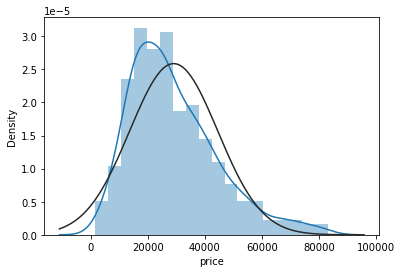

In [927]:
from scipy.stats import norm
sms.distplot(cars_data.price, fit=norm)
plt.savefig("unianalysis1.png",dpi=300,bbox_inches='tight')

#### After performing Univariate analysis of price we observed that the graph is right skewed so we need to cut some values from right to make it follow Normal Distribution

In [928]:
inde=cars_data.loc[cars_data['price']>65000].index

cars_data.drop(inde,inplace=True)
#Here we are removing the values greater than 65000 so that price will follow normal distribution

#### The new graph after the values are cut , it resembles almost Normal distribution

C:\Users\singl\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


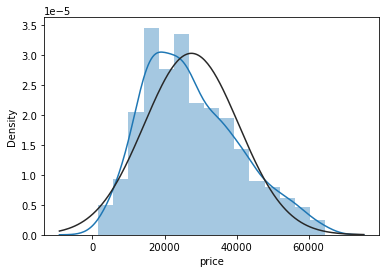

In [929]:
sms.distplot(cars_data.price, fit=norm)
plt.savefig("unianalysis2.png",dpi=300,bbox_inches='tight')

### Univariate Analysis of the Miles column

In [ ]:
from scipy.stats import norm
sms.distplot(cars_data.miles, fit=norm)
# Creating graph of miles column to understand if miles follow Normal distribution or not 


C:\Users\singl\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='miles', ylabel='Density'>

####  We determined graph is too right skewed and if we try to cut values it will result in loss of lot of data points which will result in Model being overfit

### MULTIVARIATE ANALYSIS OF PRICE AND MILES

In [ ]:
plt.scatter(cars_data['miles'],cars_data['price'])
plt.title("Price and Miles")
plt.xlabel("Miles")
plt.ylabel("Price")
plt.savefig("multianalysis.png",dpi=300,bbox_inches='tight')
plt.show()
#Relationship between Price and Miles

##### From the above plot it can be seen that Miles and Price are inversely proportional to each other. Higher the Miles lower the price and vice versa 

### FEATURE OBSERVATION AND HYPOTHESIS

##### Developing graphs using seaborn for Coorelation Analysis

In [ ]:
#df.boxplot() # Box plot
cars_data.boxplot(column=['price', 'miles', 'drive_FWD'])
plt.savefig("box.png",dpi=300,bbox_inches='tight')
plt.show()


#### We saw that there are significant outliers in the miles feature

### LINEAR REGRESSION MODELS

#### Linear regression using manual feature selection having no Transformation and no feature Scaling

In [ ]:
response=cars_data.price
#putting the variable into y for Linear regression

In [ ]:
df_manual=cars_data[['miles','drive_FWD']]
#Seeing the correlation of various features , we can see that miles and drive_fwd have the high correlation so we are adding it to newly created Dataframe

In [ ]:
df_manual.head(5)

In [ ]:
from sklearn.model_selection import train_test_split

# split the dataset according to Df manual
X_train, X_test, Y_train, Y_test = train_test_split(df_manual, response, test_size=0.25, random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, Y_train)
pred = model.predict(X_test)
r2 = model.score(X_test, Y_test)
print("R^2 is ", r2)
#Applying Linear Regression Modelling and calculating the R2

In [ ]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(Y_test, pred)

print('RMSE is ', mse**0.5)
#Calculating the RMSE

In [ ]:
feat_sel.append('Manual')

feat_transform.append('None')

feat_scaling.append('None')

r2_list.append(r2)

rmse_list.append(mse**0.5)
#Appending to List

#### Linear regression using manual feature selection having Polynomial Feature Transformation and no feature Scaling

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
pf = PolynomialFeatures(degree=2, include_bias=False)
res = pf.fit_transform(df_manual)

pd.DataFrame(pf.powers_,columns=['Miles', 'Drive_fwd'])
pf.get_feature_names(df_manual.columns)
#Creating polynomial feature transformations for the features selected Manually

In [ ]:
poly_dataframe=pd.DataFrame(res,columns=['miles', 'drive_FWD', 'miles^2', 'miles drive_FWD', 'drive_FWD^2'])
#Adding the features to the dataframe

In [ ]:
from sklearn.model_selection import train_test_split

# split the dataset according to Df manual
X_train, X_test, Y_train, Y_test = train_test_split(poly_dataframe, response, test_size=0.25, random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, Y_train)
pred = model.predict(X_test)
r2 = model.score(X_test, Y_test)
print("R^2 is ", r2)
#Applying the Linear model and calculating the R2

In [ ]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(Y_test, pred)

print('RMSE is ', mse**0.5)
# Calculating the RMSE

In [ ]:
feat_sel.append('Manual')

feat_transform.append('Poly Degree 2')

feat_scaling.append('None')

r2_list.append(r2)

rmse_list.append(mse**0.5)
#Appending to list

#### Linear regression using manual feature selection having None Feature Transformation and Robust Feature Scaling

In [ ]:
from sklearn.preprocessing import RobustScaler
rs = RobustScaler()
scaled_features = rs.fit_transform(df_manual)
scaled_features
#Applying Robust feature scaling to the features selected manually

In [ ]:
# remake the dataframe
scaled_df7 = pd.DataFrame(scaled_features, columns=df_manual.columns)
scaled_df7

In [ ]:
from sklearn.model_selection import train_test_split

# split the dataset according to Df manual
X_train, X_test, Y_train, Y_test = train_test_split(scaled_df7, response, test_size=0.25, random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, Y_train)
pred = model.predict(X_test)
r2 = model.score(X_test, Y_test)
print("R^2 is ", r2)
#Applying the model and calculating the R2

In [ ]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(Y_test, pred)

print('RMSE is ', mse**0.5)
#Calculating the RMSE

In [ ]:
feat_sel.append('Manual')

feat_transform.append('None')

feat_scaling.append('Robust')

r2_list.append(r2)

rmse_list.append(mse**0.5)

#Appending to list

#### Linear regression using manual feature selection having Polynomial  Feature Transformation and Robust Feature Scaling

In [ ]:
poly_dataframe.head(5)
## Reusing the dataframe developed above for Polynomial feature creation

In [ ]:
from sklearn.preprocessing import RobustScaler
rs = RobustScaler()
scaled_features = rs.fit_transform(poly_dataframe)
scaled_features
# remake the dataframe using Robust Scaler
scaled_df8 = pd.DataFrame(scaled_features, columns=poly_dataframe.columns)
scaled_df8

In [ ]:
from sklearn.model_selection import train_test_split

# split the dataset according to Df manual
X_train, X_test, Y_train, Y_test = train_test_split(scaled_df8, response, test_size=0.25, random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, Y_train)
pred = model.predict(X_test)
r2 = model.score(X_test, Y_test)
print("R^2 is ", r2)

#Deploying linear Regression Model

In [ ]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(Y_test, pred)

print('RMSE is ', mse**0.5)
#Calculating RMSE for the deployed model

In [ ]:
feat_sel.append('Manual')

feat_transform.append('Poly Degree 2 ')

feat_scaling.append('Robust')

r2_list.append(r2)

rmse_list.append(mse**0.5)
#Appending to list

#### Linear regression using Variance Threshold  feature selection having None Feature Transformation and None Feature Scaling

In [ ]:
from sklearn.feature_selection import VarianceThreshold
vt = VarianceThreshold(threshold = 0.15)
vt.fit(cars_data)
vt.get_support()
pd.DataFrame({'variance':vt.variances_,'select_features':vt.get_support()},index = cars_data.columns)
#Using variance Threshold Feature Seletion to select the features on the basis of threshoild value defined.
#It will exclude the features with variances greater than 0.15

In [ ]:
df_vthreshold=cars_data.iloc[:,vt.get_support()]

In [ ]:
# dropping the price column from variance threshold selected features as we are predicting price 
df_vthreshold.drop(columns='price',axis=1,inplace=True)

In [ ]:
# peaking into the variance threshold features 
df_vthreshold.head()

In [ ]:
from sklearn.model_selection import train_test_split

# split the dataset according to Df manual
X_train, X_test, Y_train, Y_test = train_test_split(df_vthreshold, response, test_size=0.25, random_state=42)

In [ ]:
# applying the linear regression model 
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, Y_train)
pred = model.predict(X_test)
# Calculating R2
r2 = model.score(X_test, Y_test)
print("R^2 is ", r2)

In [ ]:
# Calculating RMSE for  Linear regression using Variance Threshold  feature selection having None Feature Transformation and None Feature Scaling 
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(Y_test, pred)

print('RMSE is ', mse**0.5)

In [ ]:
# appending the result into the list
feat_sel.append('Variance Threshold')

feat_transform.append('None')

feat_scaling.append('None')

r2_list.append(r2)

rmse_list.append(mse**0.5)

#### Linear regression using Variance Threshold feature selection having Polynomial  Feature Transformation and None Feature Scaling

In [ ]:
df_vthreshold.head(5)

In [ ]:
## generating Polynomial Features for DataFrame that we got from variance threshold feature Selection method
from sklearn.preprocessing import PolynomialFeatures
pf = PolynomialFeatures(degree=2, include_bias=False)
res = pf.fit_transform(df_vthreshold)

pd.DataFrame(pf.powers_,columns=['miles','fuel_Gasoline','drive_FWD','color_white'])
pf.get_feature_names(df_vthreshold.columns)

In [ ]:
poly_dataframe=pd.DataFrame(res,columns=['miles',
 'fuel_Gasoline',
 'drive_FWD',
 'color_white',
 'miles^2',
 'miles fuel_Gasoline',
 'miles drive_FWD',
 'miles color_white',
 'fuel_Gasoline^2',
 'fuel_Gasoline drive_FWD',
 'fuel_Gasoline color_white',
 'drive_FWD^2',
 'drive_FWD color_white',
 'color_white^2'])

In [ ]:
# polynomial feature Dataframe
poly_dataframe

In [ ]:

from sklearn.model_selection import train_test_split

# split the dataset according to Df manual
X_train, X_test, Y_train, Y_test = train_test_split(poly_dataframe, response, test_size=0.25, random_state=42)

In [ ]:
# Applying the Linear regression Model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, Y_train)
pred = model.predict(X_test)
r2 = model.score(X_test, Y_test)
print("R^2 is ", r2)

In [ ]:

# Calculating The value of RMSE
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(Y_test, pred)

print('RMSE is ', mse**0.5)

In [ ]:
# Appending the result to the list
feat_sel.append('Variance Threshold')

feat_transform.append('Poly Degree 2')

feat_scaling.append('None')

r2_list.append(r2)

rmse_list.append(mse**0.5)


#### Linear regression using Variance Threshold feature selection having None Transformation and Robust Feature Scaling

In [ ]:
df_vthreshold.head()

In [ ]:
# Scaling the dataset that we got from Variance Threshold Feature Selection Method using Robust Scaling
from sklearn.preprocessing import RobustScaler
rs = RobustScaler()
scaled_features = rs.fit_transform(df_vthreshold)
scaled_features

# remake the dataframe
scaled_df9 = pd.DataFrame(scaled_features, columns=df_vthreshold.columns)
scaled_df9
#Dataframe after deploying Robust Scaler

In [ ]:
from sklearn.model_selection import train_test_split

# split the dataset according to Df manual
X_train, X_test, Y_train, Y_test = train_test_split(scaled_df9, response, test_size=0.25, random_state=42)

In [ ]:

# Applying the linear regression Mosdel
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, Y_train)
pred = model.predict(X_test)
r2 = model.score(X_test, Y_test)
print("R^2 is ", r2)
#Calculating the R2 after deploying linear regression model

In [ ]:
# Calculating The RMSe of the mODEL
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(Y_test, pred)

print('RMSE is ', mse**0.5)
#Calculating the RMSE

In [ ]:
# Appending the result into the list
feat_sel.append('Variance Threshold')

feat_transform.append('None')

feat_scaling.append('Robust')

r2_list.append(r2)

rmse_list.append(mse**0.5)
#Appending to the list

#### Linear regression using Variance Threshold feature selection having Polynomial Transformation and Robust Feature Scaling

In [ ]:
poly_dataframe.head()

In [ ]:
# Applying the Robust Scaler to scale the DatFrame of Polynomial Features
from sklearn.preprocessing import RobustScaler
rs = RobustScaler()
scaled_features = rs.fit_transform(poly_dataframe)
scaled_features

# remake the dataframe
scaled_df10 = pd.DataFrame(scaled_features, columns=poly_dataframe.columns)
scaled_df10

In [ ]:
from sklearn.model_selection import train_test_split

# split the dataset according to Df manual
X_train, X_test, Y_train, Y_test = train_test_split(scaled_df10, response, test_size=0.25, random_state=42)


In [ ]:
from sklearn.linear_model import LinearRegression
model1 = LinearRegression()
model1.fit(X_train, Y_train)
pred = model1.predict(X_test)
r2 = model1.score(X_test, Y_test)
print("R^2 is ", r2)

#Deploying the model and calculating the R2 and also storing the X_train and Y_test 

In [ ]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(Y_test, pred)

print('RMSE is ', mse**0.5)
#Calculating the RMSE

In [ ]:
feat_sel.append('Variance Threshold')

feat_transform.append('Poly Degree 2')

feat_scaling.append('Robust')

r2_list.append(r2)

rmse_list.append(mse**0.5)
#Appending to the list

#### Linear regression using Kbest feature selection having None Feature Transformation and None Feature Scaling

In [ ]:
from sklearn.feature_selection import SelectKBest,f_regression
X = cars_data.drop(columns='price',axis=1)
y = response
kbest = SelectKBest(f_regression, k=4).fit(X, y)
df_kbest = X.iloc[:,kbest.get_support()]
#Using the Select Kbest Feature Selection

In [ ]:
df_kbest
#Peeking into the dataset

In [ ]:
from sklearn.model_selection import train_test_split

# split the dataset according to Df manual
X_train, X_test, Y_train, Y_test = train_test_split(df_kbest, response, test_size=0.25, random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, Y_train)
pred = model.predict(X_test)
r2 = model.score(X_test, Y_test)
print("R^2 is ", r2)
#Calculating the R2

In [ ]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(Y_test, pred)

print('RMSE is ', mse**0.5)
#Calculating RMSe

In [ ]:
feat_sel.append('KBest')

feat_transform.append('None')

feat_scaling.append('None')

r2_list.append(r2)

rmse_list.append(mse**0.5)
#Appending to list

#### Linear regression using Kbest feature selection having Polynomial Feature Transformation and None Feature Scaling

In [ ]:
df_kbest

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
pf = PolynomialFeatures(degree=2, include_bias=False)
res = pf.fit_transform(df_kbest)

pd.DataFrame(pf.powers_,columns=['miles','eng_V4','drive_FWD','drive_RWD'])
pf.get_feature_names(df_kbest.columns)

In [ ]:
poly_dataframe=pd.DataFrame(res,columns=['miles',
 'eng_V4',
 'drive_FWD',
 'drive_RWD',
 'miles^2',
 'miles eng_V4',
 'miles drive_FWD',
 'miles drive_RWD',
 'eng_V4^2',
 'eng_V4 drive_FWD',
 'eng_V4 drive_RWD',
 'drive_FWD^2',
 'drive_FWD drive_RWD',
 'drive_RWD^2'])
#Developing the Polynomial Dataframe

In [ ]:
poly_dataframe

In [ ]:
from sklearn.model_selection import train_test_split

# split the dataset according to Df manual
X_train, X_test, Y_train, Y_test = train_test_split(poly_dataframe, response, test_size=0.25, random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, Y_train)
pred = model.predict(X_test)
r2 = model.score(X_test, Y_test)
print("R^2 is ", r2)
#Deploying the R2

In [ ]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(Y_test, pred)

print('RMSE is ', mse**0.5)
#Displaying the RMSE

In [ ]:
feat_sel.append('KBest')

feat_transform.append('Poly Degree 2')

feat_scaling.append('None')

r2_list.append(r2)

rmse_list.append(mse**0.5)
#Appending to the list

#### Linear regression using Kbest feature selection having None Feature Transformation and Robust Feature Scaling

In [ ]:
df_kbest

In [ ]:
from sklearn.preprocessing import RobustScaler
rs = RobustScaler()
scaled_features = rs.fit_transform(df_kbest)
scaled_features

# remake the dataframe
scaled_df11 = pd.DataFrame(scaled_features, columns=df_kbest.columns)
scaled_df11
#Deploying the Robust Scaler to scale the features

In [ ]:
from sklearn.model_selection import train_test_split

# split the dataset according to Df manual
X_train, X_test, Y_train, Y_test = train_test_split(scaled_df11, response, test_size=0.25, random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, Y_train)
pred = model.predict(X_test)
r2 = model.score(X_test, Y_test)
print("R^2 is ", r2)
#Applying the model and calculating R2

In [ ]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(Y_test, pred)

print('RMSE is ', mse**0.5)
#Calculating RMSE

In [ ]:
feat_sel.append('KBest')

feat_transform.append('None')

feat_scaling.append('Robust')

r2_list.append(r2)

rmse_list.append(mse**0.5)
#Appending to list 

#### Linear regression using Kbest feature selection having Polynomial Feature Transformation and Robust Feature Scaling

In [ ]:
df_kbest.head(5)
#Peeking into the dataframe

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
pf = PolynomialFeatures(degree=2, include_bias=False)
res = pf.fit_transform(df_kbest)

pd.DataFrame(pf.powers_,columns=['miles','eng_V4','drive_FWD','drive_RWD'])
pf.get_feature_names(df_kbest.columns)
#Deploying the Polynomial Feature Transformation

In [ ]:
poly_dataframe=pd.DataFrame(res,columns=['miles',
 'eng_V4',
 'drive_FWD',
 'drive_RWD',
 'miles^2',
 'miles eng_V4',
 'miles drive_FWD',
 'miles drive_RWD',
 'eng_V4^2',
 'eng_V4 drive_FWD',
 'eng_V4 drive_RWD',
 'drive_FWD^2',
 'drive_FWD drive_RWD',
 'drive_RWD^2'])
#Dataframe created having polynomial features

In [ ]:
poly_dataframe

In [ ]:
from sklearn.preprocessing import RobustScaler
rs = RobustScaler()
scaled_features = rs.fit_transform(poly_dataframe)
scaled_features

# remake the dataframe
scaled_df12 = pd.DataFrame(scaled_features, columns=poly_dataframe.columns)
scaled_df12
# Deploying the Robust Scaler 

In [ ]:
from sklearn.model_selection import train_test_split

# split the dataset according to Df manual
X_train, X_test, Y_train, Y_test = train_test_split(scaled_df12, response, test_size=0.25, random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, Y_train)
pred = model.predict(X_test)
r2 = model.score(X_test, Y_test)
print("R^2 is ", r2)
#Applying the model and calculating the R2

In [ ]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(Y_test, pred)

print('RMSE is ', mse**0.5)
#Displaying RMSE of the deployed Model

In [ ]:
feat_sel.append('KBest')

feat_transform.append('Poly Degree 2')

feat_scaling.append('Robust')

r2_list.append(r2)

rmse_list.append(mse**0.5)
##Appending to list 

#### Ridge Alpha Normalised Regression

In [ ]:
from sklearn.linear_model import Ridge,Lasso
#Importing Required libraries for Ridge and Lasso

In [ ]:
y = cars_data.price
x = cars_data.drop('price', axis=1)
x
#Storing the X and Y for model

In [ ]:
alphas = 10**np.linspace(5, -2, 10)
alphas
#Getting the values for alphas

In [ ]:
from sklearn.model_selection import train_test_split

# split the dataset according to Df manual
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [ ]:
r21_list = []
rmse_list1 = []
for a in alphas:
    ridge = Ridge(alpha = a, normalize = True, max_iter=1000)
    ridge.fit(X_train, Y_train) 
    pred = ridge.predict(X_test)
    #Calculating the predictions 

    
    r21_list.append(ridge.score(x, y))
    rmse = mean_squared_error(Y_test, pred)**0.5;
    rmse_list1.append(rmse)
    print("RMSE ", rmse)          # Calculate the test MSE

ridge_result = np.vstack((alphas, rmse_list1, r21_list)).T
ridge_df = pd.DataFrame(ridge_result, columns=['Alpha', 'RMSE', "R2"])
ridge_df

In [ ]:
r2 = ridge.score(X_test,Y_test)
print("R^2 is ",r2)

In [ ]:
ridge = Ridge(alpha = 0.59948, normalize = True)
ridge.fit(X_train, Y_train)            
pred = ridge.predict(X_test)
#Model Deployment
print(pd.Series(ridge.coef_, index = x.columns)) # Print coefficients
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(Y_test, pred)

print('RMSE is ', mse**0.5)
#Calculating RMSE for the deployed model
feat_sel.append('Ride normalized alpha = 0.59948')

feat_transform.append('None')

feat_scaling.append('None')

r2_list.append(r2)

rmse_list.append(mse**0.5)
#Appending to list

In [ ]:
x_ax = range(len(pred))
plt.scatter(x_ax,Y_test,s=5,color = 'blue' , label="orignal")
plt.plot(x_ax,pred,lw = 0.8 , color = 'red' , label = "predictor")
plt.legend()
plt.show()
#Scatter plot to depict original and predicted values 

#### Lasso Alpha Normalised Regression

In [ ]:
alphas = np.linspace(1, 0.1, 10)
alphas

In [ ]:
r22_list = []
rmse_list2 = []
for a in alphas:
    lasso = Lasso(alpha = a, normalize = True, max_iter=1000)
    lasso.fit(X_train, Y_train)             
    pred = lasso.predict(X_test)
#Deploying the prediction using lasso regression
    
    r22_list.append(ridge.score(x, y))
    rmse = mean_squared_error(Y_test, pred)**0.5;
    rmse_list2.append(rmse)
    print("RMSE ", rmse)          # Calculate the test MSE

lasso_result = np.vstack((alphas, rmse_list2, r22_list)).T
lasso_df = pd.DataFrame(lasso_result, columns=['Alpha', 'RMSE', "R2"])
lasso_df


In [ ]:
r2 = lasso.score(X_test,Y_test)
print("R^2 is ",r2)

In [ ]:
lasso = Lasso(alpha = 1.0, normalize = True)
lasso.fit(X_train, Y_train)             # Fit a lasso regression on the training data 
pred = lasso.predict(X_test) 
coef = lasso.coef_.transpose()
coef# Use this model to predict the test data
predictions=pred
print(pd.Series(lasso.coef_, index = x.columns)) # Print coefficients

In [ ]:
Variable_for = X_test
Variable_for
#Variables for storing the X_test of best selected model

In [ ]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(Y_test, pred)

print('RMSE is ', mse**0.5)
#Calculating RMSE for the deployed model

In [ ]:
feat_sel.append('Lasso alpha=1.0 normalised')

feat_transform.append('None')

feat_scaling.append('None')

r2_list.append(r2)

rmse_list.append(mse**0.5)
## appending to the list

### Analysis of all the linear models deployed and further analying the R2 and RMSE

In [ ]:
compare = np.vstack((feat_sel, feat_transform, feat_scaling, r2_list, rmse_list)).T 
compare_df = pd.DataFrame (compare, columns=['Feature Selection', 'Feature Transformation', 'Feature S','R2','RMSE'])
compare_df
#Final table consisting of all R2 and RMSE values 

In [ ]:
x_ax = range(len(pred))
plt.scatter(x_ax,Y_test,s=5,color = 'blue' , label="orignal")
plt.plot(x_ax,pred,lw = 0.8 , color = 'red' , label = "predictor")
plt.legend()
plt.show()
#Scatter plot to depict original and predicted values

### Analysis and Selection of Best Linear Model

### After analysis we analysed that Linear model applied using Lasso normalised Transformation is best Linear model 

#### Plotting the Scatter Plot between actual and Predicted values

In [ ]:

actual_values = Y_test
#alpha helps to show overlapping data
plt.scatter(predictions, actual_values, alpha=.7,
            color='b')
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('Linear Regression Model')
plt.savefig('finalline.png', dpi=400, bbox_inches='tight')
plt.show()


#Scatter Plot to print between Actual and PRedicted Values

In [ ]:
# the coefficient list
feat = list(Variable_for.columns)

coef_table = np.vstack((feat, coef)).T
df = pd.DataFrame(coef_table, columns=['Feature', 'Coefficients'])
df